## [3단계] AI 모델링
---

- 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

## Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [34]:
# Tensorflow 설치하기
# pip install Tensorflow

* 데이터 프레임 관련 라이브러리

In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### **나.  학습데이터 불러오기**

In [2]:
data = pd.read_csv('train_dataset.csv')

### **다.  데이터 전처리**

In [3]:
# 범주형 데이터 가변수화
data = data.replace(['malicious', 'benign'], [0, 1])

In [4]:
# 결측치 처리
data.dropna(axis=0, inplace=True)

In [5]:
# 의미 없는 데이터 제거
data = data.drop('Unnamed: 0', axis=1)

In [6]:
# 한 가지 값으로만 채워진 열 제거
data = data.drop(['url_chinese_present', "html_num_tags('applet')"], axis=1)

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = data.drop('Result_v1', axis=1)
y = data['Result_v1']

In [9]:
# train_test_split 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### **마. Confusion Matrix 함수 정의**


- Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
- 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [10]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import *

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    # ax.set_xticklabels(labels, rotation='90', minor=True)
    ax.set_xticklabels(labels, fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize+5,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

- [예시] Confusion Matrix 사용 방법<span>

- 샘플
    - confusion = confusion_matrix(test_y, dt_pred)
    - fig, ax = plt.subplots(figsize=(10,3))
    - plot_confusion_matrix(ax, confusion, fontsize=30)


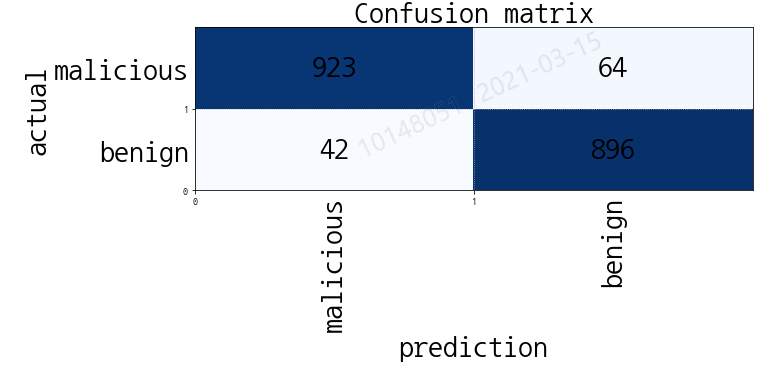

In [13]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

---

### Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

#### 1. Decision Tree

In [14]:
# 1. import
from sklearn.tree import DecisionTreeClassifier

In [49]:
# 2.선언 
m1 = DecisionTreeClassifier()

In [50]:
# 3. fit(), 학습
m1.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
# 4. predict(), 예측
p1 = m1.predict(x_test)

In [52]:
# train 및 val 데이터 정확도 확인 
print(classification_report(y_test, p1))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       531
           1       0.91      0.93      0.92       568

    accuracy                           0.92      1099
   macro avg       0.92      0.92      0.92      1099
weighted avg       0.92      0.92      0.92      1099



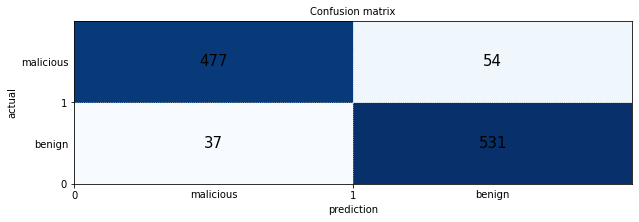

In [53]:
# Test 데이터 결과 Confusion Matrix 확인
c1 = confusion_matrix(y_test, p1)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, c1, fontsize=10)

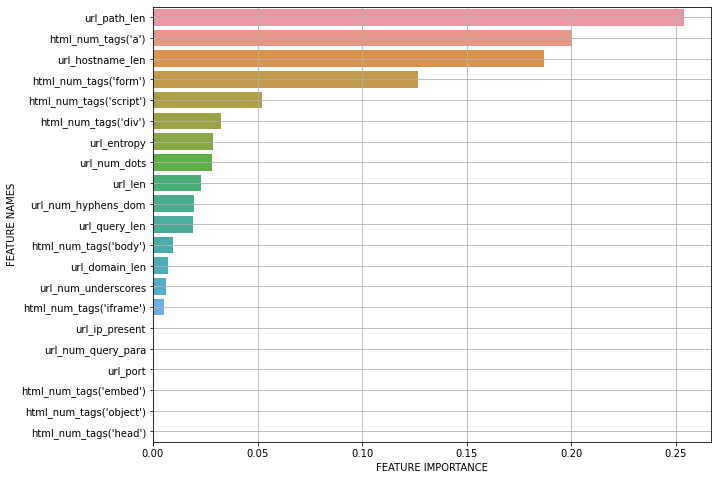

In [54]:
# Feature(특징)별 가중치 확인
m1_importance = plot_feature_importance(m1.feature_importances_, list(x_train))

#### 2. Random Forest

In [16]:
# 1. import
from sklearn.ensemble import RandomForestClassifier

In [22]:
# 2.선언 
m2 = RandomForestClassifier()

In [23]:
# 3. fit(), 학습
m2.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
# 4. predict(), 예측
p2 = m2.predict(x_test)

In [25]:
# train 및 val 데이터 정확도 확인 
print(classification_report(y_test, p2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       547
           1       0.95      0.95      0.95       552

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



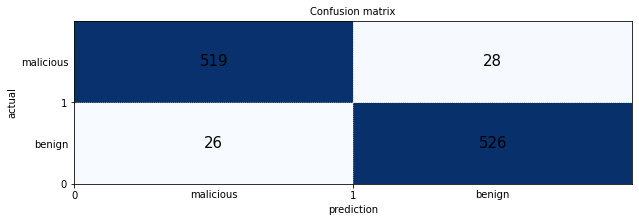

In [26]:
# Test 데이터 결과 Confusion Matrix 확인
c2 = confusion_matrix(y_test, p2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, c2, fontsize=10)

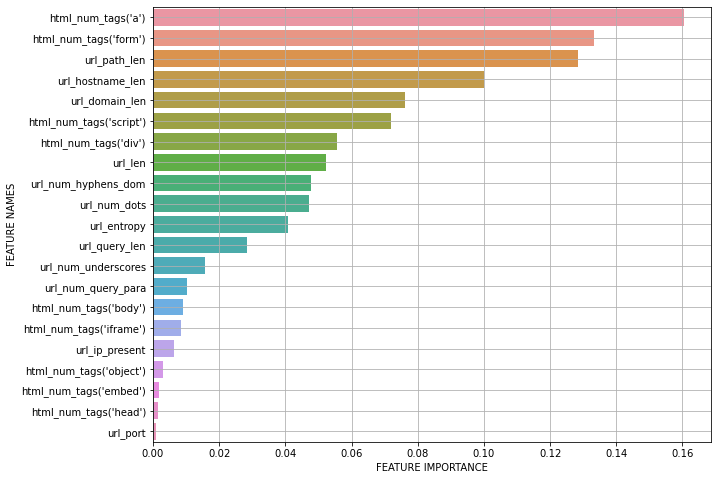

In [61]:
# Feature(특징)별 가중치 확인
m2_importance = plot_feature_importance(m2.feature_importances_, list(x_train))

#### 3. XGBoost

In [62]:
# 1. import
from xgboost import XGBClassifier

In [63]:
# 2.선언 
m3 = XGBClassifier()

In [64]:
# 3. fit(), 학습
m3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
# 4. predict(), 예측
p3 = m3.predict(x_test)

In [66]:
# train 및 val 데이터 정확도 확인 
print(classification_report(y_test, p3))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       531
           1       0.95      0.96      0.96       568

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



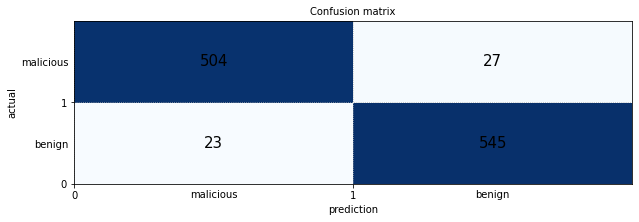

In [69]:
# Test 데이터 결과 Confusion Matrix 확인
c3 = confusion_matrix(y_test, p3)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, c3, fontsize=10)

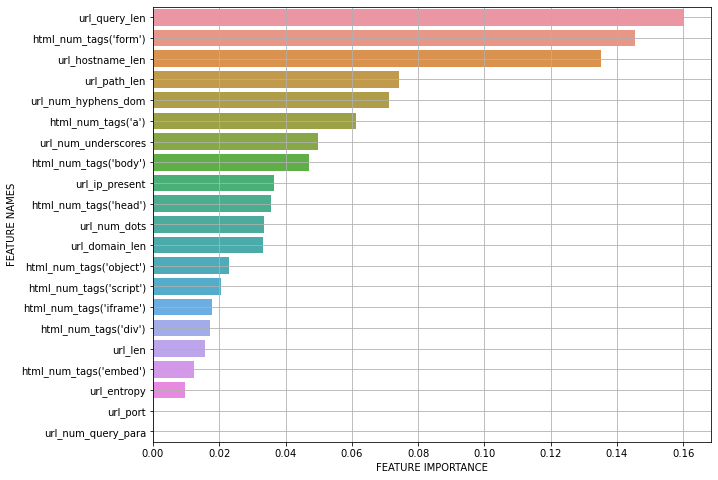

In [68]:
# Feature(특징)별 가중치 확인
m3_importance = plot_feature_importance(m3.feature_importances_, list(x_train))

---

### 모델 튜닝

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### 1. Decision Tree

In [83]:
dt_params = {'max_depth': range(2, 21, 2), 'min_samples_leaf': range(1, 10)}

In [84]:
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)

In [85]:
dt_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 21, 2),
                         'min_samples_leaf': range(1, 10)})

In [86]:
dt_gs.best_params_

{'max_depth': 16, 'min_samples_leaf': 1}

In [87]:
dt_gs.best_score_

0.9375837597465887

In [124]:
dt_t = DecisionTreeClassifier(max_depth=16, min_samples_leaf=1)

In [125]:
dt_t.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [126]:
pred1 = dt_t.predict(x_test)

In [127]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       531
           1       0.92      0.94      0.93       568

    accuracy                           0.92      1099
   macro avg       0.93      0.92      0.92      1099
weighted avg       0.92      0.92      0.92      1099



#### 2. Random Forest

In [97]:
rf_params = {'n_estimators': range(10, 201, 10), 'max_features': range(1, 22)}

In [98]:
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)

In [99]:
rf_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 22),
                         'n_estimators': range(10, 201, 10)})

In [100]:
rf_gs.best_params_

{'max_features': 2, 'n_estimators': 160}

In [101]:
rf_gs.best_score_

0.9641051413255362

In [27]:
rf_t = RandomForestClassifier(max_features=2, n_estimators=160)

In [28]:
rf_t.fit(x_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=160)

In [29]:
pred2 = rf_t.predict(x_test)

In [30]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       547
           1       0.95      0.95      0.95       552

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



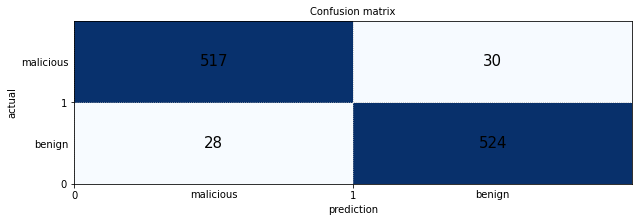

In [31]:
# Test 데이터 결과 Confusion Matrix 확인
cf = confusion_matrix(y_test, pred2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, cf, fontsize=10)

#### 3. XGBoost

In [106]:
xgb_params = {'max_depth': range(1, 11), 
              'n_estimators': range(100, 201, 10), 
              'learning_rate': np.linspace(0.15, 0.25, 10)
            }

In [107]:
xgb_gs = GridSearchCV(XGBClassifier(), xgb_params, cv=5)

In [108]:
xgb_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [109]:
xgb_gs.best_params_

{'learning_rate': 0.17222222222222222, 'max_depth': 5, 'n_estimators': 130}

In [110]:
xgb_gs.best_score_

0.9664481298732944

In [116]:
xgb_t = XGBClassifier(learning_rate=0.17, max_depth=5, n_estimators=130)

In [117]:
xgb_t.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.17, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
pred3 = xgb_t.predict(x_test)

In [119]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.96      0.96      0.96       568

    accuracy                           0.96      1099
   macro avg       0.96      0.96      0.96      1099
weighted avg       0.96      0.96      0.96      1099



---

### Stacking Model

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
estimators = [('dt', DecisionTreeClassifier(max_depth=16, min_samples_leaf=1)),
              ('rf', RandomForestClassifier(max_features=2, n_estimators=160)),
              ('xgb', XGBClassifier(learning_rate=0.17, max_depth=5, n_estimators=130))]

model_stacking = StackingClassifier(estimators=estimators
                                    , final_estimator= RandomForestClassifier())

In [113]:
model_stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=16)),
                               ('rf',
                                RandomForestClassifier(max_features=2,
                                                       n_estimators=160)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,...
                                              interaction_constraints=None,
                                              learni

In [114]:
pred = model_stacking.predict(x_test)

In [115]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       531
           1       0.94      0.96      0.95       568

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099

